# Импорт и параметры ("стандартные" значения)

In [8]:
%pip install -r requirements.txt
import matplotlib.pyplot as plt
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of poetry to determine which version is compatible with other requirements. This could take a while.
  Using cached platformdirs-2.5.1-py3-none-any.whl.metadata (9.1 kB)
  Using cached pkginfo-1.8.2-py2.py3-none-any.whl.metadata (9.6 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pexpect-4.8.0-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached packaging-21.3-py3-none-any.whl.metadata (15 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl.metadata (7.4 kB)
INFO: pip is still looking at multiple versions of poetry to determine which version is compatible with other requirements. This could take a while.
  Using cached nvidia_nvtx_cu11-11.8.86-py3-none-manylinux2014_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_nccl_cu11-2.21.5-py3-none-many

In [4]:
from variables import *

# Вспомогательные функции

In [3]:
from aux_func import *

from int_no_approx import *

from time_and_coord_int import *

# Вероятность и интенсивность излучения

In [6]:
from probability_intensity import *

# Графики

## Двойная дифференциальная вероятность $\frac{d W}{d p_z' d k_{\perp}}$

In [7]:
print(si, 10, pzi, sf, 0, pzf, phi_k, lambda_, t_in, t_out)

1 10 tensor(0.1960, dtype=torch.float64) 1 0 tensor(0.1960, dtype=torch.float64) tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(25600000., dtype=torch.float64) tensor(2.5600e+10, dtype=torch.float64)


<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_16100/1076658726.py:18: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("$k_{\perp} (eV)$", fontsize = 16)
/tmp/ipykernel_16100/1076658726.py:23: SyntaxWarning: invalid escape sequence '\p'
  label = f"$s_i={si}$\n$l_i= 10$\n$p_z={pzi}$\n$s_f={sf}$\n$p_z'={pzf}$\n$\phi = 0$\n$\lambda={lambda_}$\n$t_{{in}}=10^{{-6}}$\n$t_{{out}}=2.59 \cdot 10^{{10}}$"
/tmp/ipykernel_16100/1076658726.py:23: SyntaxWarning: invalid escape sequence '\c'
  label = f"$s_i={si}$\n$l_i= 10$\n$p_z={pzi}$\n$s_f={sf}$\n$p_z'={pzf}$\n$\phi = 0$\n$\lambda={lambda_}$\n$t_{{in}}=10^{{-6}}$\n$t_{{out}}=2.59 \cdot 10^{{10}}$"


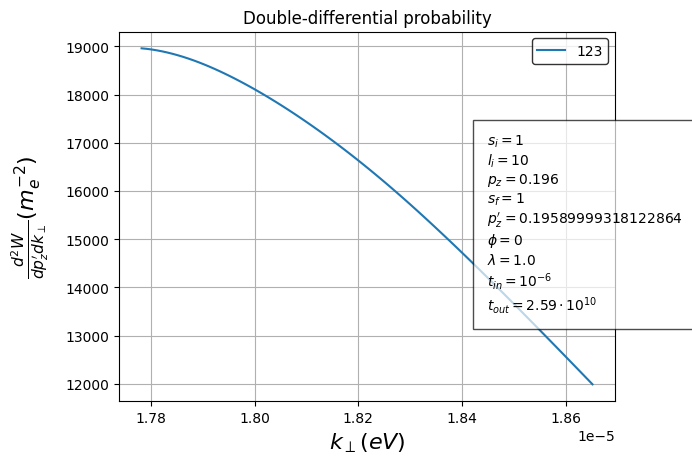

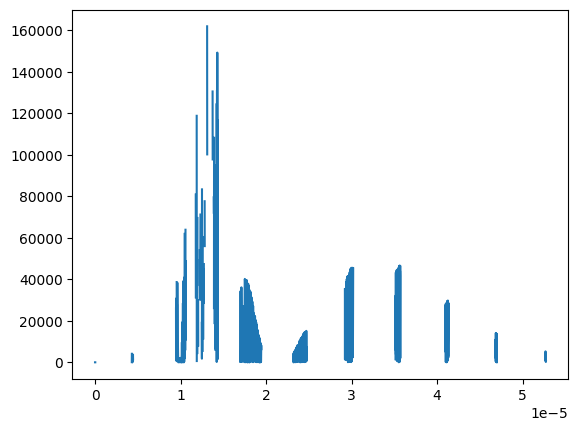

In [12]:

ks = torch.linspace(1e-10,1e-4,10000)
k_ticks = np.linspace(0,1e-4,10)
k_ticks_ev = np.round(np.linspace(0,1e-4 * 0.511 * 10**6, 10), 2)
li = 33
lf = 33
pzf = torch.tensor(0.1959)
t_in = torch.tensor(1.32e8)
t_out = torch.tensor(2.59e10)

plt.figure()
check = ks*abs(Sfi_wide_sm(si, li, pzi, sf, lf, pzf, ks, phi_k, lambda_, t_in, t_out))**2
check2 = apply_savgol_filter_to_tensor(
        ks * torch.abs(Sfi_wide(si, li, pzi, sf, lf, pzf, kp, phi_k, lambda_, t_in, t_out))**2, 20)
check3 = apply_savgol_filter_to_tensor(ks*abs(Sfi_wide(si, li, pzi, sf, lf, pzf, ks, phi_k, lambda_, t_in, t_out))**2, 20)
#plt.plot(ks, check, label='123')
#plt.plot(ks, check2, label='123')
plt.plot(ks, check3, label='123')
plt.xlabel("$k_{\perp} (eV)$", fontsize = 16)
#plt.xticks(k_ticks, k_ticks_ev, rotation=0)
plt.ylabel(r"$\frac{d^2 W}{d p_z^{\prime} d k_{\perp}} (m_e^{-2})$", rotation=90, fontsize = 16, labelpad=10)
plt.title("Double-differential probability")
plt.grid()
label = f"$s_i={si}$\n$l_i= 10$\n$p_z={pzi}$\n$s_f={sf}$\n$p_z'={pzf}$\n$\phi = 0$\n$\lambda={lambda_}$\n$t_{{in}}=10^{{-6}}$\n$t_{{out}}=2.59 \cdot 10^{{10}}$"
plt.figtext(0.7, 0.3, label, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})

legend = plt.legend(frameon=True)

# Настроим цвет фона и рамки легенды
legend.get_frame().set_facecolor('white')      # белый фон
legend.get_frame().set_edgecolor('black')      # черная рамка
legend.get_frame().set_linewidth(1.0)          # толщина рамки

plt.show()
unf = ks*abs(Sfi_wide(si, li, pzi, sf, lf, pzf, ks, phi_k, lambda_, t_in, t_out))**2

plt.figure()
plt.plot(ks, unf)

In [13]:
k123 = torch.tensor(1e-4)
k123*abs(Sfi_wide(si, 100, pzi, sf, 100, pzf, k123, phi_k, lambda_, t_in, t_out))**2

tensor(7.3511e-06, dtype=torch.float64)

In [14]:
ks*abs(Sfi_wide(si, li, pzi, sf, lf, pzf, ks, phi_k, lambda_, t_in, t_out))**2

tensor([2.5451e-11, 2.6230e-05, 2.0674e-04,  ...,        nan,        nan,
               nan], dtype=torch.float64)

## Дифференциальная вероятность $\frac{d W}{d p_z'}$

<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_16100/1212648323.py:22: SyntaxWarning: invalid escape sequence '\c'
  label = f"$p_z={pzi} (m_e)$\n$s_i={si}$, $l_i= 10$, $s_f={sf}$\n$t_{{in}}=10^{{-6}} s$\n$t_{{out}}=2.59 \cdot 10^{{10}} s$"
/home/ulyana/.local/lib/python3.12/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.12/dist-packages/autoray/autoray.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torchquad/integration/utils.py:2

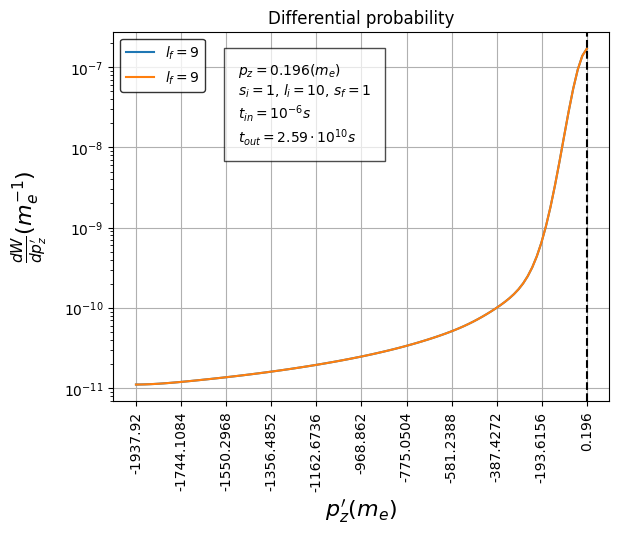

In [15]:
pzf_max_ = pzi.item()
pzf_min_ = pzf_min.item()
pzs = np.linspace(pzf_min_, pzf_max_, 100)

pz_ticks = np.round(np.linspace(pzf_min_, pzf_max_, 11), 5)
#pz_ticks_ev = np.round(np.linspace(pzf_min * 0.511 * 10**6, pzf_max * 0.511 * 10**6, 11), 2)

plt.figure()
cmap = plt.get_cmap('magma')
for lf in range(9, 10):
    check = smooth_wavelet([dW_dpzf_unpol_wide_sm(si, 10, pzi, sf, lf, pz, t_in, t_out, kp_max) for pz in pzs], sigma=5)
    check2 = smooth_wavelet([dW_dpzf_unpol_wide_sm_old(si, 10, pzi, sf, lf, pz, t_in, t_out, kp_max) for pz in pzs], sigma=5)
    plt.plot(pzs, check, label=f'$l_f={lf}$')
    plt.plot(pzs, check2, label=f'$l_f={lf}$')
    plt.yscale("log")
    plt.xlabel("$p_z' (m_e)$", fontsize = 16)
    plt.xticks(pz_ticks, pz_ticks, rotation=90)
    plt.ylabel(r"$\frac{d W}{d p_z^{\prime}} (m_e^{-1})$", rotation=90, fontsize = 16, labelpad=10)
    plt.title("Differential probability")
    plt.grid()

    label = f"$p_z={pzi} (m_e)$\n$s_i={si}$, $l_i= 10$, $s_f={sf}$\n$t_{{in}}=10^{{-6}} s$\n$t_{{out}}=2.59 \cdot 10^{{10}} s$"
    plt.figtext(0.32, 0.65, label, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})

    legend = plt.legend(frameon=True)

    # Настроим цвет фона и рамки легенды
    legend.get_frame().set_facecolor('white') # белый фон
    legend.get_frame().set_edgecolor('black') # черная рамка
    legend.get_frame().set_linewidth(1.0) # толщина рамки
# plt.ylim(10**-5, 10**-1)
plt.axvline(x=pzi, color='black', linestyle='--', label=f'$p_z = {pzi}$')
plt.show()

## Полная вероятность

/usr/local/lib/python3.12/dist-packages/autoray/autoray.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torchquad/integration/utils.py:248: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(


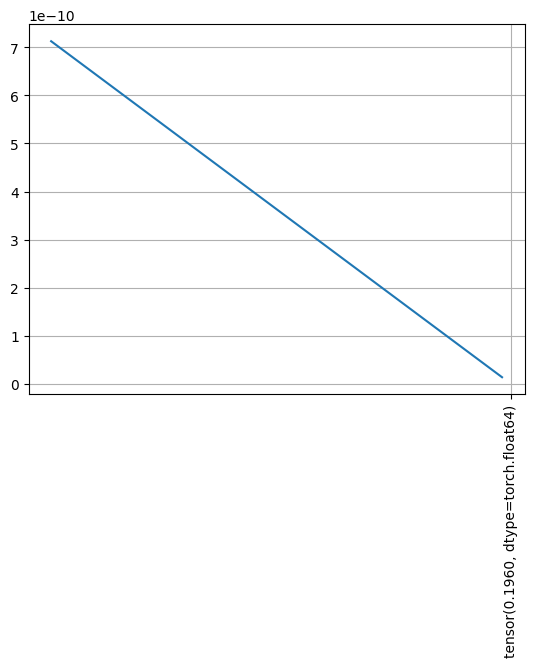

In [16]:
pzs = np.linspace(-10,0,10)
lf = 1

pz_ticks = np.round(np.linspace(-100000,pzi,11), 5)
pz_ticks_ev = np.round(np.linspace(-100000* 0.511 * 10**6,pzi * 0.511 * 10**6, 10), -1)
plt.xticks(pz_ticks, pz_ticks, rotation=90)
plt.plot(pzs, [full_prob(si, li, pzi, sf, lf, 10/F0, t_out, 1e-4,pzmin) for pzmin in pzs])
plt.grid()

Integrating:   0%|          | 0/80 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/autoray/autoray.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torchquad/integration/utils.py:248: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(
Integrating: 100%|██████████| 80/80 [2:38:02<00:00, 118.53s/it]  


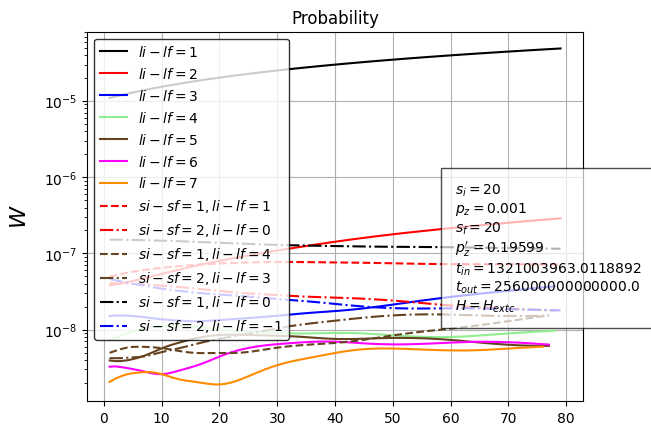

In [133]:
HtoHc = torch.tensor(1, dtype=dtype, device=device) # Величина магнитного поля: 2.27e-10 -> 1T
rho_H = 2.0 / torch.sqrt(HtoHc) # Магнитная длина: для H = 1 T магнитная длина 132 744 комптоновских длин волн или 5.12e-8 m = 0.512 nm
kp_max = 10 / rho_H
F0 = torch.tensor(7.57e-8, dtype=dtype, device=device) # 100 MV / m
pzf_min = 0
pzi = torch.tensor(1e-3, dtype=dtype, device=device)
pzf_max = pzi

si = 20
li = 1
sf = 20
lf = 1
t_in = 100 / F0
t_out = torch.tensor(2.56e14, dtype=dtype, device=device) # 100 m

full_prob_li_lf_1_Hc = []
full_prob_li_lf_2_Hc = []
full_prob_li_lf_3_Hc = []
full_prob_li_lf_4_Hc = []
full_prob_li_lf_5_Hc = []
full_prob_li_lf_6_Hc = []
full_prob_li_lf_7_Hc = []
full_prob_si_sf_1_li_lf_1_Hc = []
full_prob_si_sf_2_li_lf_0_Hc = []
full_prob_si_sf_1_li_lf_4_Hc = []
full_prob_si_sf_2_li_lf_3_Hc = []
full_prob_si_sf_1_li_lf_0_Hc = []
full_prob_si_sf_2_li_lf_m1_Hc = []

#lf_arr = [i for i in range(1, 80)]
lf_arr = [i for i in range(1, 81)]

HtoHc = torch.tensor(1e-2, dtype=dtype, device=device) # Величина магнитного поля: 2.27e-10 -> 1T
rho_H = 2.0 / torch.sqrt(HtoHc)

darkbrown = '#654321'
darkorange = '#FF8C00'

plt.figure()
for lf in tqdm(lf_arr, desc="Integrating", colour="green"):
    full_prob_li_lf_1_Hc.append(full_prob(si, lf + 1, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_li_lf_2_Hc.append(full_prob(si, lf + 2, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_li_lf_3_Hc.append(full_prob(si, lf + 3, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_li_lf_4_Hc.append(full_prob(si, lf + 4, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_li_lf_5_Hc.append(full_prob(si, lf + 5, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_li_lf_6_Hc.append(full_prob(si, lf + 6, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_li_lf_7_Hc.append(full_prob(si, lf + 7, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_si_sf_1_li_lf_1_Hc.append(full_prob(sf+1, lf + 1, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_si_sf_2_li_lf_0_Hc.append(full_prob(sf+2, lf, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_si_sf_1_li_lf_4_Hc.append(full_prob(sf+1, lf + 4, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_si_sf_2_li_lf_3_Hc.append(full_prob(sf+2, lf + 3, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_si_sf_1_li_lf_0_Hc.append(full_prob(sf+1, lf, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
    full_prob_si_sf_2_li_lf_m1_Hc.append(full_prob(sf+2, lf - 1, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))
plt.plot(lf_arr, full_prob_li_lf_1_Hc, label='$li - lf = 1$', color = 'black')
plt.plot(lf_arr, full_prob_li_lf_2_Hc, label='$li - lf = 2$', color = 'red')
plt.plot(lf_arr, full_prob_li_lf_3_Hc, label='$li - lf = 3$', color = 'blue')
plt.plot(lf_arr, full_prob_li_lf_4_Hc, label='$li - lf = 4$', color = 'lightgreen')
plt.plot(lf_arr, full_prob_li_lf_5_Hc, label='$li - lf = 5$', color = darkbrown)
plt.plot(lf_arr, full_prob_li_lf_6_Hc, label='$li - lf = 6$', color = 'magenta')
plt.plot(lf_arr, full_prob_li_lf_7_Hc, label='$li - lf = 7$', color = darkorange)
plt.plot(lf_arr, full_prob_si_sf_1_li_lf_1_Hc, label='$si - sf = 1, li - lf = 1$', color = 'red', linestyle = '--')
plt.plot(lf_arr, full_prob_si_sf_2_li_lf_0_Hc, label='$si - sf = 2, li - lf = 0$', color = 'red', linestyle = '-.')
plt.plot(lf_arr, full_prob_si_sf_1_li_lf_4_Hc, label='$si - sf = 1, li - lf = 4$', color = darkbrown, linestyle = '--')
plt.plot(lf_arr, full_prob_si_sf_2_li_lf_3_Hc, label='$si - sf = 2, li - lf = 3$', color = darkbrown, linestyle = '-.')
plt.plot(lf_arr, full_prob_si_sf_1_li_lf_0_Hc, label='$si - sf = 1, li - lf = 0$', color = 'black', linestyle = '-.')
plt.plot(lf_arr, full_prob_si_sf_2_li_lf_m1_Hc, label='$si - sf = 2, li - lf = -1$', color = 'blue', linestyle = '-.')
#plt.xlabel("$k_{\perp} (eV)$", fontsize = 16)
#plt.xticks(k_ticks, k_ticks_ev, rotation=0)
plt.yscale("log")
plt.ylabel(r"$W$", fontsize = 16, labelpad=10)
plt.title("Probability")
plt.grid()
label = f"$s_i={si}$\n$p_z={pzi}$\n$s_f={sf}$\n$p_z'={pzf}$\n$t_{{in}}={t_in}$\n$t_{{out}}={t_out}$\n$H = H_{{\text{{c}}}}$"
plt.figtext(0.7, 0.3, label, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})

legend = plt.legend(frameon=True)

# Настроим цвет фона и рамки легенды
legend.get_frame().set_facecolor('white')      # белый фон
legend.get_frame().set_edgecolor('black')      # черная рамка
legend.get_frame().set_linewidth(1.0)          # толщина рамки

plt.show()

/tmp/ipykernel_745/631012108.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pzmin_arr = [torch.tensor(0), torch.tensor(pzi - 1e-3), torch.tensor(pzi - 2e-5)]
Integrating:   0%|          | 0/80 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/autoray/autoray.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torchquad/integration/utils.py:248: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(
Integrating: 100%|██████████| 80/80 [36:13<00:00, 27.17s/it]


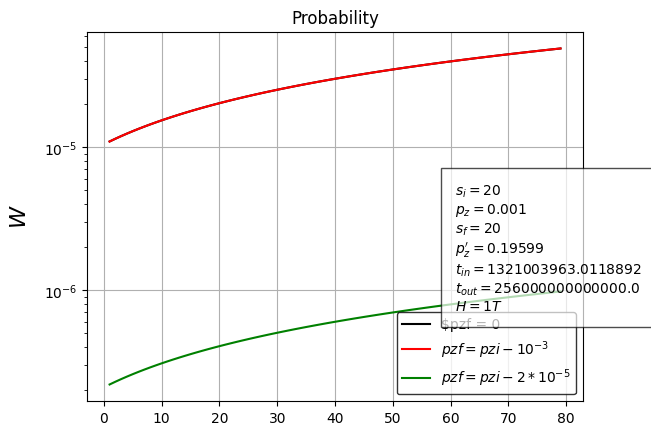

In [134]:
full_prob_li_lf_1_pzmin1 = []
full_prob_li_lf_1_pzmin2 = []
full_prob_li_lf_1_pzmin3 = []

pzmin_arr = [torch.tensor(0), torch.tensor(pzi - 1e-3), torch.tensor(pzi - 2e-5)]


lf_arr = [i for i in range(1, 81)]


darkbrown = '#654321'
darkorange = '#FF8C00'

plt.figure()
for lf in tqdm(lf_arr, desc="Integrating", colour="green"):
    full_prob_li_lf_1_pzmin1.append(full_prob(si, lf + 1, pzi, sf, lf, t_in, t_out, kp_max, pzmin_arr[0]))
    full_prob_li_lf_1_pzmin2.append(full_prob(si, lf + 1, pzi, sf, lf, t_in, t_out, kp_max, pzmin_arr[1]))
    full_prob_li_lf_1_pzmin3.append(full_prob(si, lf + 1, pzi, sf, lf, t_in, t_out, kp_max, pzmin_arr[2]))
plt.plot(lf_arr, full_prob_li_lf_1_pzmin1, label='$pzf = 0', color = 'black')
plt.plot(lf_arr, full_prob_li_lf_1_pzmin2, label='$pzf = pzi - 10^{{-3}}$', color = 'red')
plt.plot(lf_arr, full_prob_li_lf_1_pzmin3, label='$pzf = pzi - 2 * 10^{{-5}}$', color = 'green')

#plt.xlabel("$k_{\perp} (eV)$", fontsize = 16)
#plt.xticks(k_ticks, k_ticks_ev, rotation=0)
plt.yscale("log")
plt.ylabel(r"$W$", fontsize = 16, labelpad=10)
plt.title("Probability")
plt.grid()
label = f"$s_i={si}$\n$p_z={pzi}$\n$s_f={sf}$\n$p_z'={pzf}$\n$t_{{in}}={t_in}$\n$t_{{out}}={t_out}$\n$H = 1 T$"
plt.figtext(0.7, 0.3, label, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})

legend = plt.legend(frameon=True)

# Настроим цвет фона и рамки легенды
legend.get_frame().set_facecolor('white')      # белый фон
legend.get_frame().set_edgecolor('black')      # черная рамка
legend.get_frame().set_linewidth(1.0)          # толщина рамки

plt.show()

In [15]:
pzmin_arr = [torch.tensor(0), torch.tensor(pzi - 1e-3), torch.tensor(pzi - 2e-5)]
print(pzmin_arr[1])

tensor(0., dtype=torch.float64)


/tmp/ipykernel_4996/2451456664.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pzmin_arr = [torch.tensor(0), torch.tensor(pzi - 1e-3), torch.tensor(pzi - 2e-5)]


Integrating: 100%|██████████| 14/14 [00:30<00:00,  2.20s/it]


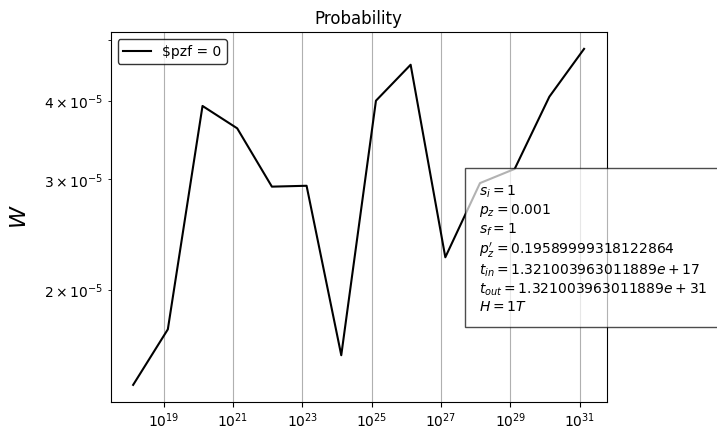

In [16]:
HtoHc = torch.tensor(1, dtype=dtype, device=device) # Величина магнитного поля: 2.27e-10 -> 1T
rho_H = 2.0 / torch.sqrt(HtoHc) # Магнитная длина: для H = 1 T магнитная длина 132 744 комптоновских длин волн или 5.12e-8 m = 0.512 nm
kp_max = 10 / rho_H
F0 = torch.tensor(7.57e-16, dtype=dtype, device=device) # 1 V / m
pzf_min = 0

si = 1
li = 1
sf = 1
lf = 1
t_in = 100 / F0
t_out = 2 * t_in

full_prob_mag = []


lf_arr = [i for i in range(1, 3)]
sf_arr = [i for i in range(1, 10)]
t_out_arr = [t_in * 10**i for i in range(1, 15)]


darkbrown = '#654321'
darkorange = '#FF8C00'

plt.figure()
for t_out in tqdm(t_out_arr, desc="Integrating", colour="green"):
    full_prob_mag.append(full_prob(si, li, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))

# plt.plot(lf_arr, full_prob_mag, label='$pzf = 0', color = 'black')
plt.plot(t_out_arr, full_prob_mag, label='$pzf = 0', color = 'black')

#plt.xlabel("$k_{\perp} (eV)$", fontsize = 16)
#plt.xticks(k_ticks, k_ticks_ev, rotation=0)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$W$", fontsize = 16, labelpad=10)
plt.title("Probability")
plt.grid()
label = f"$s_i={si}$\n$p_z={pzi}$\n$s_f={sf}$\n$p_z'={pzf}$\n$t_{{in}}={t_in}$\n$t_{{out}}={t_out}$\n$H = 1 T$"
plt.figtext(0.7, 0.3, label, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})

legend = plt.legend(frameon=True)

# Настроим цвет фона и рамки легенды
legend.get_frame().set_facecolor('white')      # белый фон
legend.get_frame().set_edgecolor('black')      # черная рамка
legend.get_frame().set_linewidth(1.0)          # толщина рамки

plt.show()

In [17]:
print(full_prob(si, li, pzi, sf, lf, t_in, 10000 * t_in, kp_max, pzf_min))

tensor(3.6191e-05, dtype=torch.float64)


Integrating: 100%|██████████| 9/9 [00:26<00:00,  2.89s/it]


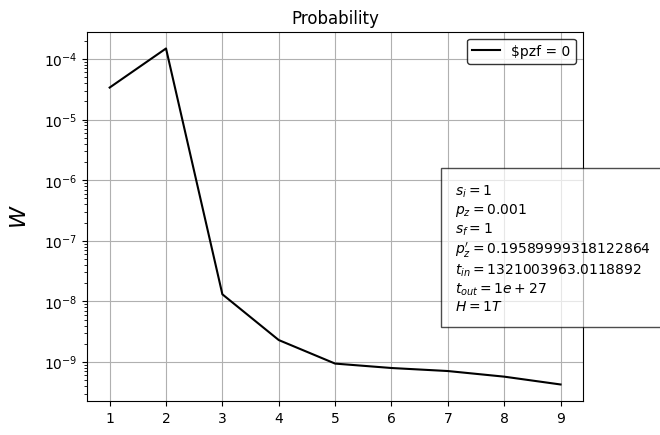

In [18]:
HtoHc = torch.tensor(1, dtype=dtype, device=device) # Величина магнитного поля: 2.27e-10 -> 1T
rho_H = 2.0 / torch.sqrt(HtoHc) # Магнитная длина: для H = 1 T магнитная длина 132 744 комптоновских длин волн или 5.12e-8 m = 0.512 nm
kp_max = 10 / rho_H
F0 = torch.tensor(7.57e-8, dtype=dtype, device=device) # 100 MV / m
pzf_min = 0

si = 1
li = 1
sf = 1
lf = 1
t_in = 100 / F0
t_out = 1e27

full_prob_mag = []


lf_arr = [i for i in range(1, 10)]
sf_arr = [i for i in range(1, 10)]


darkbrown = '#654321'
darkorange = '#FF8C00'

plt.figure()
for lf in tqdm(sf_arr, desc="Integrating", colour="green"):
    full_prob_mag.append(full_prob(si, li, pzi, sf, lf, t_in, t_out, kp_max, pzf_min))

plt.plot(lf_arr, full_prob_mag, label='$pzf = 0', color = 'black')

#plt.xlabel("$k_{\perp} (eV)$", fontsize = 16)
#plt.xticks(k_ticks, k_ticks_ev, rotation=0)
plt.yscale("log")
plt.ylabel(r"$W$", fontsize = 16, labelpad=10)
plt.title("Probability")
plt.grid()
label = f"$s_i={si}$\n$p_z={pzi}$\n$s_f={sf}$\n$p_z'={pzf}$\n$t_{{in}}={t_in}$\n$t_{{out}}={t_out}$\n$H = 1 T$"
plt.figtext(0.7, 0.3, label, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})

legend = plt.legend(frameon=True)

# Настроим цвет фона и рамки легенды
legend.get_frame().set_facecolor('white')      # белый фон
legend.get_frame().set_edgecolor('black')      # черная рамка
legend.get_frame().set_linewidth(1.0)          # толщина рамки

plt.show()